# Fundamentals of Machine Learning - Exercise 8
Goal of the excercise is to learn how to use Scikit-learn library for a classification tasks and evaluate the performance of the proposed models.

![meme04](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_04.jpg?raw=true)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

## Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Useful links
* Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Metrics https://scikit-learn.org/stable/modules/model_evaluation.html
* K-Fold CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
* Random forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# 🎯 What is our goal for this dataset?
* 🔎 What are the input features?
* 🔎 What is the output?
* 🔎 What should the model do?

## Load the titanic.csv dataset first

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 📊 Each task starts with basic exploration of the data

## How many passangers survived?
* Are the labels balanced?

In [3]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


# 💡 We need to pre-process the data first before training any ML model
* We want to use only numerical attributes as a model features
* Certain attributes need to be dropped and some of them can be encoded

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_01.jpg?raw=true)

## Which features could be encoded and which methods would you use?

In [4]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
df.describe(include=np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## How many values are missing in the individual attributes?

In [6]:
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0
Fare,0


# 🔎 Which features would you drop and why?

## Let's drop Name and Ticket features - these have no use for us now

In [7]:
df = df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


# 🚤 Extract the deck identifier from the Cabin feature
* 💡 A = top deck, G = lowest deck
  
1) Change type to string
   
2) Filter the first letter using *apply* function
   
3) If the value is *nan* use *U* value as an replacement - this will mark the passangers with missing Cabin value
   
4) Replace the T value with A

In [15]:
# Instead of: df.Cabin = df.Cabin.fillna('U')
# Use .loc to be explicit:
df.loc[:, 'Cabin'] = df['Cabin'].fillna('U')

# Instead of: df.Cabin = df.Cabin.str[0]
# Use .loc:
df.loc[:, 'Cabin'] = df['Cabin'].str[0]

# Instead of: df.Cabin = df.Cabin.replace('T', 'A')
# Use .loc:
df.loc[:, 'Cabin'] = df['Cabin'].replace('T', 'A')

In [17]:
df.Cabin.value_counts()

,count
Cabin,
C,51
B,43
D,31
E,30
A,13
F,11
G,4


# ⚠ The Age feature is tricky, we have multiple solutions for dealing with missing values, e.g.:

1) Drop the feature

2) Take the mean/median value to replace the missing value

3) Take a random list of ages that maintains the original statistical summary values

4) Use a model to predict values based on the existing values

## We will use the second option ✌

## Check the boxplot *before* and *after* the replacement
* 🔎 Is there any change?

Text(0.5, 1.0, 'Before')

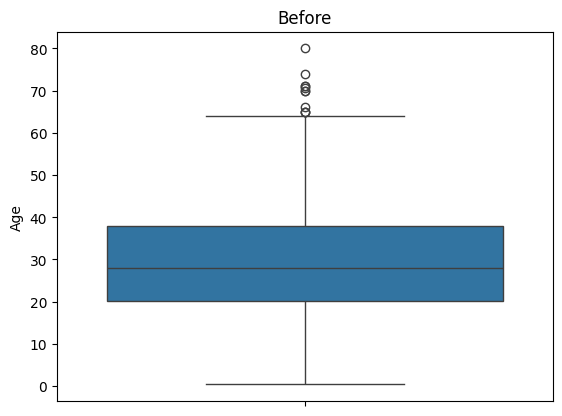

In [8]:
sns.boxplot(y=df.Age).set_title('Before')

In [19]:
median_age = df.Age.median()
df.loc[:, 'Age'] = df['Age'].fillna(median_age)

Text(0.5, 1.0, 'After')

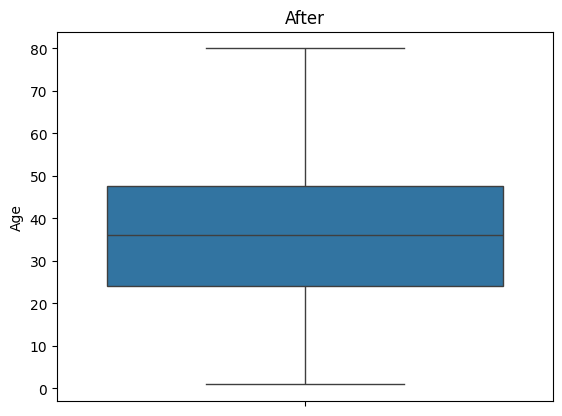

In [20]:
sns.boxplot(y=df.Age).set_title('After')

## Two passangers don't have the *Embarked* feature filled - we can drop these two rows

In [22]:
df = df.dropna()

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,C
4,1,1,female,35.0,1,0,53.1000,C,S
7,0,1,male,54.0,0,0,51.8625,E,S
11,1,3,female,4.0,1,1,16.7000,G,S
12,1,1,female,58.0,0,0,26.5500,C,S
...,...,...,...,...,...,...,...,...,...
872,1,1,female,47.0,1,1,52.5542,D,S
873,0,1,male,33.0,0,0,5.0000,B,S
880,1,1,female,56.0,0,1,83.1583,C,C


## The last step of the pre-processing pipeline is to encode *Sex*, *Cabin* and *Embarked* features 👊
* We will use one-hot encoding for *Sex* and *Embarked* and Ordinal encoding for Cabin
* Specify the encoding scheme for the ordinal encoding using an array in a form ['first', 'second', 'third', ...]

In [24]:
cabin_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
enc_cabin = OrdinalEncoder(categories=[cabin_categories])
enc_cabin.fit_transform(df[['Cabin']])[:, 0][:10]

array([2., 2., 4., 6., 2., 3., 0., 2., 3., 1.])

## Encode *Cabin* feature

In [25]:
df.loc[:, 'Cabin'] = enc_cabin.fit_transform(df[['Cabin']])[:, 0]

## Encode *Sex* feature

In [26]:
sex_categories = ['male', 'female']
enc_sex = OrdinalEncoder(categories=[sex_categories])
df.loc[:, 'Sex'] = enc_sex.fit_transform(df[['Sex']])[:, 0]

## Check the results

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
2,1,1,1.0,38.0,1,0,71.2833,2.0,C
4,1,1,1.0,35.0,1,0,53.1000,2.0,S
7,0,1,0.0,54.0,0,0,51.8625,4.0,S
11,1,3,1.0,4.0,1,1,16.7000,6.0,S
12,1,1,1.0,58.0,0,0,26.5500,2.0,S


## The final step is to encode the *Embarked* using a one-hot encoding

In [28]:
pd.get_dummies(df['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
2,True,False,False
4,False,False,True
7,False,False,True
11,False,False,True
12,False,False,True
...,...,...,...
872,False,False,True
873,False,False,True
880,True,False,False


## Concat the original `df` with a `pd.get_dummies` encoding result

In [29]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)

# The dataset is finally ready for the machine learning model training! 😍
* Let's take a one last look if everything is OK and we are good to go!

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
2,1,1,1.0,38.0,1,0,71.2833,2.0,True,False,False
4,1,1,1.0,35.0,1,0,53.1000,2.0,False,False,True
7,0,1,0.0,54.0,0,0,51.8625,4.0,False,False,True
11,1,3,1.0,4.0,1,1,16.7000,6.0,False,False,True
12,1,1,1.0,58.0,0,0,26.5500,2.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,1.0,47.0,1,1,52.5542,3.0,False,False,True
873,0,1,0.0,33.0,0,0,5.0000,1.0,False,False,True
880,1,1,1.0,56.0,0,1,83.1583,2.0,True,False,False


# 🚀 Let's start with splitting the data into the input and output part
* Usually named as a *X* and *y* variables
* What is the input and output?

In [31]:
X, y = df.loc[:, df.columns != 'Survived'], df.loc[:, 'Survived']

In [32]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
2,1,1.0,38.0,1,0,71.2833,2.0,True,False,False
4,1,1.0,35.0,1,0,53.1000,2.0,False,False,True
7,1,0.0,54.0,0,0,51.8625,4.0,False,False,True
11,3,1.0,4.0,1,1,16.7000,6.0,False,False,True
12,1,1.0,58.0,0,0,26.5500,2.0,False,False,True


In [33]:
y.head()

,Survived
PassengerId,
2,1
4,1
7,0
11,1
12,1


# We usually want to split the data into two sets called `train` and `test`
* 🔎 Why do we do that?
* Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [34]:
# We use test_size=0.2 (20%) and random_state for reproducibility
# We also use stratify=y to keep the same class balance as in the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

# Check shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (146, 10)
X_test shape: (37, 10)
y_train shape: (146,)
y_test shape: (37,)


# 🌳 Create the Decision tree classifier instance

In [35]:
# Create an instance with a random_state for reproducibility
clf = DecisionTreeClassifier(random_state=13)

## Use `fit()` method for training the classifier

In [36]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

## Lets use trained model for the prediction of the survival of the passenger
* 💡 Get predictions via the `predict()` method

In [37]:
y_pred = clf.predict(X_test)

# Show first 10 predictions
print(y_pred[:10])

[0 1 0 1 1 0 1 1 1 1]


# How can we evaluate our model?
* There are multiple metrics used: Accuracy, Recall, Precision, F1-Score, etc.
* 💡 Very useful is also creating a confusion matrix

# 🔎 How can we select the metric?
* 💡 Accuracy and F1-Score are the most universal metrics

## 🔎 When is **Accuracy** unsuitable?

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_02.jpg?raw=true)

# Take a look at this [article](https://builtin.com/data-science/precision-and-recall) and [wiki](https://en.wikipedia.org/wiki/Precision_and_recall) about precision and recall
* 💡 Beware the fact that as we increase precision, we decrease recall and vice-versa.

* **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.
    * The question that precision answer is of all passengers that labeled as survived, how many actually survived?
    * High precision relates to the low false positive rate.


* **Recall** is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
    * The question recall answers is: Of all the passengers that truly survived, how many did we label?

* **F1 Score** is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
    * Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
    * 💡 **F1 works best if false positives and false negatives have similar cost**
        * If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

$ConfMatrix = \begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}$

## Let's take a look at an example:
$|1| = 10$

$|0| = 90$

$M = \begin{bmatrix}
1 & 9\\
0 & 90
\end{bmatrix}$

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN} = \frac{1+90}{1+90+0+9} = \frac{91}{100} = 0.91$

$Precision = \frac{TP}{TP+FP} = \frac{1}{1+0} = 1$

$Recall = \frac{TP}{TP+FN} = \frac{1}{1+9} = \frac{1}{10} = 0.1$

$F1-Score = 2 \cdot \frac{Precision \cdot Recall}{Precision+Recall} = 2 \cdot \frac{1 \cdot 0.1}{1+0.1} = 2 \cdot \frac{0.1}{1.1} = 0.09$

In [38]:
# We already have y_test and y_pred
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Recall: {rec:.4f}')
print(f'Precision: {prec:.4f}')

Accuracy: 0.6757
F1-Score: 0.7600
Recall: 0.7600
Precision: 0.7600


## What does the confusion matrix tell us?
* 🔎 Where do we find true positives, false positives, etc?

<Axes: >

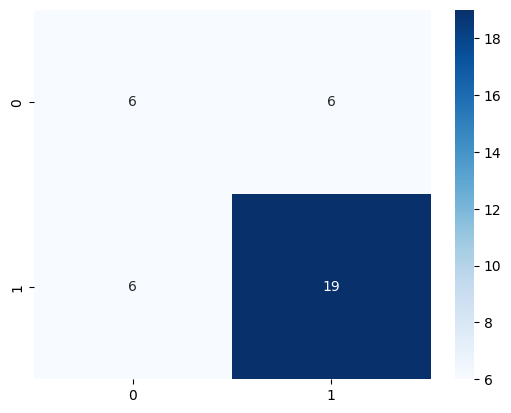

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(np.int64(6), np.int64(6), np.int64(6), np.int64(19))

# 🚀 We can compute any metric that we wish

In [41]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.6757


In [42]:
print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')

F1-Score: 0.7600


In [43]:
print(f'Recall: {recall_score(y_test, y_pred):.4f}')

Recall: 0.7600


In [44]:
print(f'Precision: {precision_score(y_test, y_pred):.4f}')

Precision: 0.7600


# Can we improve our evaluation process?
* Lets try **cross-validation** process for the decision tree model
    * https://scikit-learn.org/stable/modules/cross_validation.html
* **What is the difference between Pure and Stratified K-Fold?**
    * 💡 Take a look at the survival ratio

In [45]:
# Using KFold as mentioned in the text, with 5 splits.
# shuffle=True is important to randomize the data before splitting.
kf = KFold(n_splits=5, shuffle=True, random_state=13)

scores_kf = []
fold_idx = 1

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    clf_fold = DecisionTreeClassifier(random_state=13)
    clf_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf_fold.predict(X_test_fold)
    scores_kf.append(f1_score(y_test_fold, y_pred_fold))

    # Check survival ratio as hinted
    print(f'Fold {fold_idx}: Survival ratio in train: {y_train_fold.value_counts(normalize=True)[1]:.2f}; test: {y_test_fold.value_counts(normalize=True)[1]:.2f}')
    fold_idx += 1

print(f'\nKFold F1 Scores: {scores_kf}')

Fold 1: Survival ratio in train: 0.71; test: 0.54
Fold 2: Survival ratio in train: 0.68; test: 0.62
Fold 3: Survival ratio in train: 0.68; test: 0.65
Fold 4: Survival ratio in train: 0.64; test: 0.81
Fold 5: Survival ratio in train: 0.65; test: 0.75

KFold F1 Scores: [0.8085106382978723, 0.76, 0.723404255319149, 0.8148148148148148, 0.8679245283018868]


## After the k-Fold CV is complete we usually want to compute statistics from the desired metric...

In [46]:
print(f'Mean F1: {np.mean(scores_kf):.4f}')
print(f'Min F1: {np.min(scores_kf):.4f}')
print(f'Max F1: {np.max(scores_kf):.4f}')
print(f'Std Dev F1: {np.std(scores_kf):.4f}')

Mean F1: 0.7949
Min F1: 0.7234
Max F1: 0.8679
Std Dev F1: 0.0495


## ... or create a boxplot out of it 🔬

Text(0.5, 1.0, 'K-Fold Cross-Val F1 Scores')

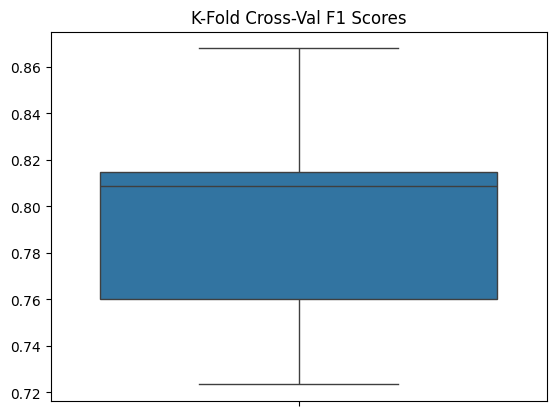

In [47]:
sns.boxplot(y=scores_kf).set_title('K-Fold Cross-Val F1 Scores')

In [48]:
skf = StratifiedKFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')

scores

Survival ratio in train set: 0.67; Survival ratio in test set: 0.68
Survival ratio in train set: 0.67; Survival ratio in test set: 0.68
Survival ratio in train set: 0.67; Survival ratio in test set: 0.68
Survival ratio in train set: 0.67; Survival ratio in test set: 0.67
Survival ratio in train set: 0.67; Survival ratio in test set: 0.67


[0.7346938775510204,
 0.9056603773584906,
 0.7346938775510204,
 0.7346938775510204,
 0.84]

In [49]:
np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.7899484020023103),
 np.float64(0.7346938775510204),
 np.float64(0.9056603773584906))

<Axes: >

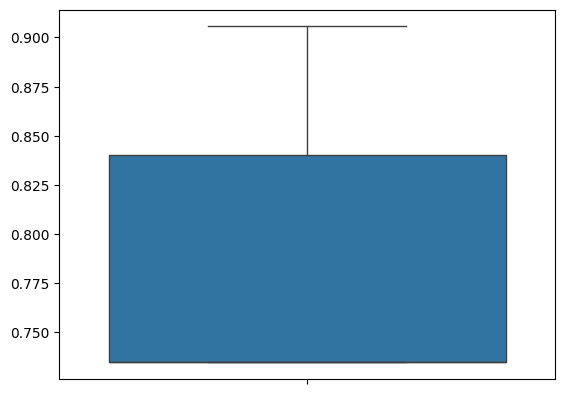

In [50]:
sns.boxplot(y=scores)

# 📊 ML algorithms usually have hyper-parameters which change the behaviour of the model
* It is usually a good idea to check documentation 😊
    * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* For the *DecisionTreeClassifier* a `max_depth` or `min_samples_split` are pretty important

* 🎯 The goal of the hyper-parameter tuning is to investigate the effect of the parameters on the model and ideally make the model better with setting the right parameters
    * Some models are more sensitive to parameters settings

## 🚀 Let's tune the `max_depth` first

In [51]:
scores_global = []
# Let's test max_depth from 1 to 30
for d in range(1, 31):
    # Using KFold as in the examples below
    skf = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = DecisionTreeClassifier(max_depth=d, random_state=13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))

    scores_global.append((d, np.mean(scores)))
scores_global[:10]

[(1, np.float64(0.7777563985918942)),
 (2, np.float64(0.7931648493573364)),
 (3, np.float64(0.7753667778882497)),
 (4, np.float64(0.7992311641637787)),
 (5, np.float64(0.804774828437999)),
 (6, np.float64(0.8235168784494931)),
 (7, np.float64(0.8028274541974294)),
 (8, np.float64(0.8151761575457469)),
 (9, np.float64(0.8201209668933812)),
 (10, np.float64(0.8100617371309511))]

In [52]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
25,26,0.794931
26,27,0.794931
27,28,0.794931
28,29,0.794931
29,30,0.794931


## Now we can plot the data
* 🔎 Which setting is the best?

<Axes: xlabel='max_depth', ylabel='f1'>

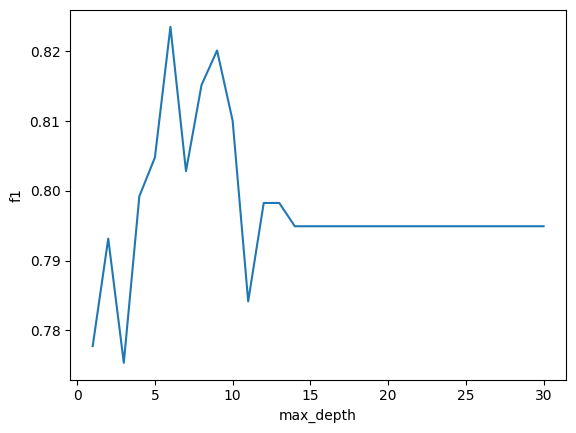

In [53]:
sns.lineplot(data = df_res, x='max_depth', y='f1')

In [54]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
5,6,0.823517
8,9,0.820121
7,8,0.815176
9,10,0.810062
4,5,0.804775


## 🚀 Now we can continue with `min_samples_split`

In [55]:
scores_global = []
for x in np.arange(2, 50):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global.append((x, np.mean(scores)))

scores_global[:10]

[(np.int64(2), np.float64(0.8468270024991128)),
 (np.int64(3), np.float64(0.8318071798400984)),
 (np.int64(4), np.float64(0.829434981807523)),
 (np.int64(5), np.float64(0.8369821516188438)),
 (np.int64(6), np.float64(0.826508329209962)),
 (np.int64(7), np.float64(0.8378876340081733)),
 (np.int64(8), np.float64(0.8413658948777387)),
 (np.int64(9), np.float64(0.8455891226303782)),
 (np.int64(10), np.float64(0.8451146164541796)),
 (np.int64(11), np.float64(0.8350446863842496))]

In [56]:
df_res = pd.DataFrame.from_records(scores_global, columns=['min_samples_split', 'f1'])
df_res.tail(10)

,min_samples_split,f1
38,40,0.823355
39,41,0.823355
40,42,0.823355
41,43,0.823355
42,44,0.823355
43,45,0.823355
44,46,0.823355
45,47,0.823355
46,48,0.823355
47,49,0.823355


<Axes: xlabel='min_samples_split', ylabel='f1'>

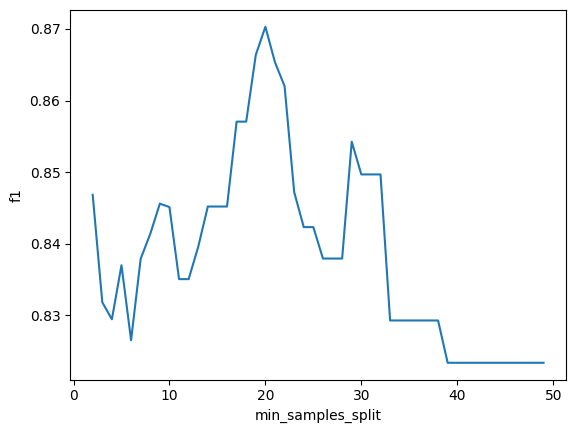

In [57]:
sns.lineplot(data = df_res, x='min_samples_split', y='f1')

### Which setting is the best?

In [58]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
18,20,0.870306
17,19,0.866380
19,21,0.865341
20,22,0.862008
15,17,0.857050


## 🎯 So now we can try the combination of the best parameter-wise settings

In [59]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 12, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.8342489585885813),
 np.float64(0.75),
 np.float64(0.9056603773584906))

### 🔎 Is the model now better than the *default* one?

## Alternatively we can tune both parameters at once 😇

In [60]:
scores_global = []
for d in range(2, 25):
    for split in range(2, 50):
        skf = KFold(n_splits=5)
        scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth = d, min_samples_split = split, random_state = 13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(f1_score(y_test, y_pred))
        scores_global.append((d, split, np.mean(scores)))

In [61]:
df_res = pd.DataFrame.from_records(scores_global, columns=['max_depth', 'min_samples_split', 'f1'])
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,min_samples_split,f1
401,10,19,0.873103
402,10,20,0.870306
1026,23,20,0.870306
930,21,20,0.870306
978,22,20,0.870306


## And try the best combination again 😊
* 💡You don't have to write these codes by hand, sklearn already provides function for it
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [62]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 11, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.8254756448033758),
 np.float64(0.6666666666666666),
 np.float64(0.9090909090909091))

# ✅ Task (2p)
* Take a look at the different models in the sklearn
    * https://scikit-learn.org/stable/supervised_learning.html
* Choose one model that you want to try, check how it works and what hyperparameters are the most important
    * You know some of them from the the lectures but you can also check online tutorials, blogs or YouTube 🙂
* Use the model in default settings
* Tune at least one of the hyper-parameters and compare the model proposed during the lecture and the one you just created
    * Beat the default `DecisionTreeClassifier`

* **Describe the insight you got from the experiments with a few sentences in a Markdown cell**
    * Mention what parameters you tuned and if the hyperparameter tuning helped!
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_08_meme_03.jpg?raw=true)

Baseline Default DecisionTreeClassifier Mean F1 Score: 0.7760
Default RandomForestClassifier Mean F1 Score: 0.7994
   n_estimators        f1
0            10  0.809261
1            20  0.817765
2            30  0.800539
3            40  0.800539
4            50  0.797459


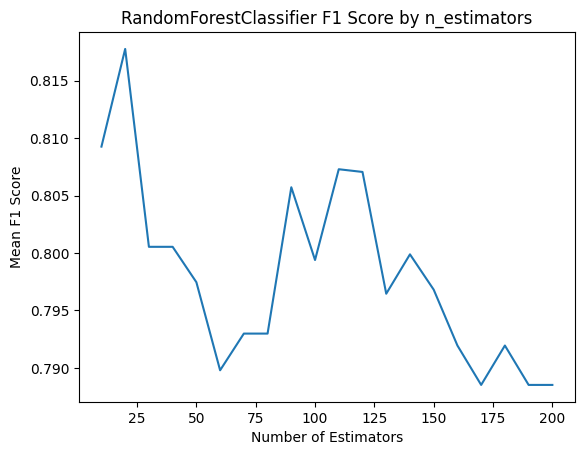

Best setting found:
n_estimators    20.000000
f1               0.817765
Name: 1, dtype: float64


In [63]:
# --- Baseline: Default DecisionTreeClassifier (using StratifiedKFold) ---

# We use StratifiedKFold to ensure the ratio of survivors/non-survivors is the same in each fold
skf_baseline = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
scores_dt = []

for train_index, test_index in skf_baseline.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Default Decision Tree
    clf_dt = DecisionTreeClassifier(random_state=13)
    clf_dt.fit(X_train, y_train)
    y_pred_dt = clf_dt.predict(X_test)
    scores_dt.append(f1_score(y_test, y_pred_dt))

mean_f1_dt = np.mean(scores_dt)
print(f"Baseline Default DecisionTreeClassifier Mean F1 Score: {mean_f1_dt:.4f}")

# --- Step 1: Use RandomForestClassifier with default settings ---

# We use the same StratifiedKFold for a fair comparison
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
scores_rf_default = []

for train_index, test_index in skf_rf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Default Random Forest
    clf_rf = RandomForestClassifier(random_state=13)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    scores_rf_default.append(f1_score(y_test, y_pred_rf))

mean_f1_rf_default = np.mean(scores_rf_default)
print(f"Default RandomForestClassifier Mean F1 Score: {mean_f1_rf_default:.4f}")

# --- Step 2: Tune a hyperparameter (n_estimators) ---
# n_estimators is one of the most important parameters. It defines the number of trees in the forest.
scores_global_rf = []

# Let's test a range of n_estimators values
estimator_range = range(10, 201, 10)

for n_est in estimator_range:
    skf_tune = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    scores_fold = []
    for train_index, test_index in skf_tune.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf_rf_tune = RandomForestClassifier(n_estimators=n_est, random_state=13)
        clf_rf_tune.fit(X_train, y_train)
        y_pred_tune = clf_rf_tune.predict(X_test)
        scores_fold.append(f1_score(y_test, y_pred_tune))

    scores_global_rf.append((n_est, np.mean(scores_fold)))

# Convert to DataFrame for plotting
df_res_rf = pd.DataFrame.from_records(scores_global_rf, columns=['n_estimators', 'f1'])
print(df_res_rf.head())

# --- Step 3: Plot tuning results ---
sns.lineplot(data=df_res_rf, x='n_estimators', y='f1')
plt.title('RandomForestClassifier F1 Score by n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean F1 Score')
plt.show()

# Find the best setting
best_rf_setting = df_res_rf.sort_values(by='f1', ascending=False).iloc[0]
print("Best setting found:")
print(best_rf_setting)